# Exploring the Data

# Imports

In [17]:
# These are our two data analysis libraries
import pandas as pd
import numpy as np
# These are our two visualization tools
import seaborn as sns
import matplotlib.pyplot as plt

sns.set( style = 'white' )


## G Patent DataFrame Loading
This is the data that we have on granted patents



In [79]:
df_patent = pd.read_csv("g_patent.tsv", delimiter='\t', dtype={'patent_id': str, 
                                                        'patent_type': str, 
                                                        'patent-date': str,
                                                        'patent_title': str,
                                                        'patent_abstract': str,
                                                        'wipo_kind': str,
                                                        'num_claims': int,
                                                        'withdrawn': int,
                                                        'filename': str})

In [119]:
df_patent['patent_date'] = pd.to_datetime(df_patent['patent_date'])

,patent_id,patent_type,patent_date,patent_title,patent_abstract,wipo_kind,num_claims,withdrawn,filename,count
0,10000000,utility,2018-06-19,Coherent LADAR using intra-pixel quadrature de...,A frequency modulated (coherent) laser detecti...,B2,20,0,ipg180619.xml,1
1,10000001,utility,2018-06-19,Injection molding machine and mold thickness c...,The injection molding machine includes a fixed...,B2,12,0,ipg180619.xml,1
2,10000002,utility,2018-06-19,Method for manufacturing polymer film and co-e...,The present invention relates to: a method for...,B2,9,0,ipg180619.xml,1
3,10000003,utility,2018-06-19,Method for producing a container from a thermo...,The invention relates to a method for producin...,B2,18,0,ipg180619.xml,1
4,10000004,utility,2018-06-19,"Process of obtaining a double-oriented film, c...",The present invention relates to provides a do...,B2,6,0,ipg180619.xml,1
...,...,...,...,...,...,...,...,...,...,...
8260137,T998013,defensive publication,1980-09-02,Protection of insect pheromones from degradati...,NaN,I4,1,0,pftaps19800902_wk36.zip,1
8260138,T998014,defensive publication,1980-09-02,"Thiazolyl couplers, coupler compositions and p...",NaN,I4,3,0,pftaps19800902_wk36.zip,1
8260139,T999001,defensive publication,1980-10-07,Sack handling device,NaN,I4,1,0,pftaps19801007_wk41.zip,1
8260140,T999002,defensive publication,1980-10-07,Application of polymeric powders to a substrate,NaN,I4,7,0,pftaps19801007_wk41.zip,1


In [122]:
df_patent.sort_values(by='patent_date',ascending=True, inplace=True)

,patent_id,patent_type,patent_date,patent_title,patent_abstract,wipo_kind,num_claims,withdrawn,filename,count
1445735,3930271,utility,1976-01-06,Golf glove,A golf glove is disclosed having an extra fin...,A,4,0,pftaps19760106_wk01.zip,1
1446660,3931196,utility,1976-01-06,Phosphinolines and phosphindolines,This invention is for phosphinoline and phosp...,A,8,0,pftaps19760106_wk01.zip,1
1446659,3931195,utility,1976-01-06,Substituted piperidines,The compounds are of the heterocyclic class o...,A,28,0,pftaps19760106_wk01.zip,1
1446658,3931194,utility,1976-01-06,"2-Heteroaryl-methyl)-5,9.beta.-dialkyl-6,7-ben...",Compounds of the formula ##SPC1## Wherein R i...,A,6,0,pftaps19760106_wk01.zip,1
1446657,3931193,utility,1976-01-06,Quinuclidine derivatives,"Quinine, quinidine and analogs thereof, are p...",A,5,0,pftaps19760106_wk01.zip,1
...,...,...,...,...,...,...,...,...,...,...
1442624,11454397,utility,2022-09-27,Fuel injectors for exhaust heaters,A fuel injector for an exhaust heater includes...,B2,12,0,ipg220927.xml,1
1442623,11454396,utility,2022-09-27,Fuel injector and pre-mixer system for a burne...,A fuel injector and mini-mixer system includes...,B1,20,0,ipg220927.xml,1
1442622,11454395,utility,2022-09-27,Thermal resistant air caps,An air cap is configured to be affixed to a no...,B2,14,0,ipg220927.xml,1
1442635,11454408,utility,2022-09-27,Air conditioner and method for controlling the...,An air conditioner includes a humidifying asse...,B2,20,0,ipg220927.xml,1


In [123]:
df_patent.tail(20)

,patent_id,patent_type,patent_date,patent_title,patent_abstract,wipo_kind,num_claims,withdrawn,filename,count
1442639,11454412,utility,2022-09-27,HVAC system and control method thereof,The present application discloses a control me...,B2,8,0,ipg220927.xml,1
1442638,11454411,utility,2022-09-27,Zone air flow rate adjustment for an HVAC system,"A heating, ventilation, and/or air conditionin...",B2,20,0,ipg220927.xml,1
1442637,11454410,utility,2022-09-27,Forecast-based automatic scheduling of a distr...,Heating and cooling systems at various geograp...,B2,25,0,ipg220927.xml,1
1442620,11454393,utility,2022-09-27,Gas burner with an offset flame port array,A gas burner includes a burner body that defin...,B2,17,0,ipg220927.xml,1
1442636,11454409,utility,2022-09-27,Failure detection method for air conditioning ...,A fault detection method for an air conditioni...,B2,10,0,ipg220927.xml,1
1442634,11454407,utility,2022-09-27,"HVAC apparatus, method, and system","The invention relates to an HVAC apparatus, me...",B1,9,0,ipg220927.xml,1
1442633,11454406,utility,2022-09-27,Dehumidifier with filtering assembly for secon...,A dehumidifier comprises a main body and a mai...,B2,13,0,ipg220927.xml,1
1442632,11454405,utility,2022-09-27,Heating devices to prevent bacteria proliferat...,An electric water heater having a water holdin...,B2,9,0,ipg220927.xml,1
1442631,11454404,utility,2022-09-27,Energy distributing system,A local energy distributing system includes a ...,B2,20,0,ipg220927.xml,1
1442630,11454403,utility,2022-09-27,Double oven gas with fan,An air baffle unit includes a major housing wa...,B2,20,0,ipg220927.xml,1


### Granted Patent Analysis and Visualization

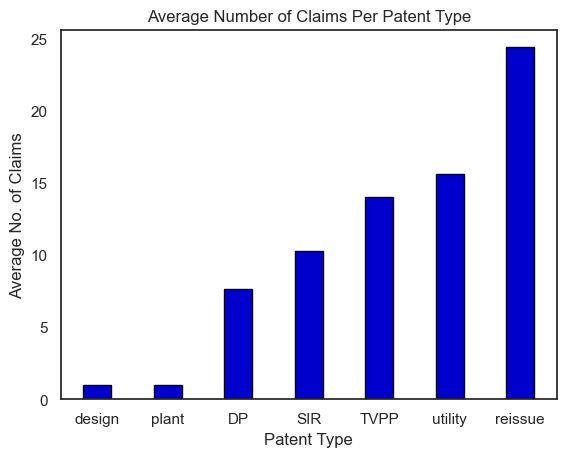

In [96]:
df_patent['count'] = 1

# Cleaning up the data to ask the question "Is there a connection between the type of patent 
# and the breadth of its claims / the number of claims"
type_counts = df_patent.groupby(['patent_type']).count()['count']
type_claims = df_patent.groupby('patent_type')['num_claims'].sum()
avg_claims = type_claims / type_counts

# Cleaning up the labels and sorting in increasing value
avg_claims.sort_values(ascending = True, inplace = True)
avg_claims.rename({'defensive publication': 'DP',
                   'statutory invention registration': 'SIR'}, inplace = True)

# creating the bar plot
plt.bar(avg_claims.index, avg_claims.values,
        color = 'mediumblue',
        edgecolor = 'black',
        width = 0.4)
 
plt.xlabel("Patent Type")
plt.ylabel("Average No. of Claims")
plt.title("Average Number of Claims Per Patent Type")
plt.show()

# What this shows us makes sense. As you get more specific in the type of patent,
# for example, a specific design you want to claim as your invention, you have less
# leeway for claiming other specific designs as yours. However, the very nature of items 
# like utility are made to cover a variety of situations and scenarios, so having
# a higher number of claims makes sense.
# Reissued patents having a noticeably higher average number of claims may tell a sort of story that I can
# further look into, maybe different patents have broadened in scope as technology advanced, or 
# other tools have advanced?

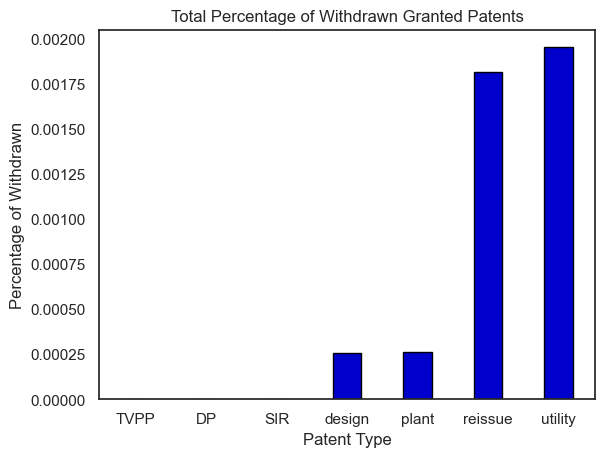

In [113]:

# Cleaning up the data to ask the question "Is there a connection between the type of patent
# and the total proportion of withdrawn patents"
type_withdrawn = df_patent.groupby('patent_type')['withdrawn'].sum()
avg_withdrawn = type_withdrawn / type_counts

# Cleaning up the data to present as a bar chart
avg_withdrawn.sort_values(ascending = True, inplace = True)
avg_withdrawn.rename({'defensive publication': 'DP',
                   'statutory invention registration': 'SIR'}, inplace = True)

# Actually plotting the data
plt.bar(avg_withdrawn.index, avg_withdrawn.values,
        color = 'mediumblue',
        edgecolor = 'black',
        width = 0.4)
 
plt.xlabel("Patent Type")
plt.ylabel("Percentage of Withdrawn")
plt.title("Total Percentage of Withdrawn Granted Patents")
plt.show()

# So what we see is something very similar to the previous bar chart displaying the correlation between 
# patent type and the number of claims. Both reissue and utility are at the tops of both charts, showing us 
# that perhaps having more claims means that the patents overreach, so the inventors have to withdraw their
# patents to scale down their number of claims

In [115]:
type_counts

patent_type
TVPP                                      3
defensive publication                   509
design                               721810
plant                                 30571
reissue                               20368
statutory invention registration       2259
utility                             7484622
Name: count, dtype: int64

### G CPC Current Loading
Current CPC classifications of granted patents. 

In [138]:
df_cpc = pd.read_table("g_cpc_current.tsv", delimiter="\t", dtype={"patent_id": int,
                                                               "cpc_sequence": int,
                                                               "cpc_section": str,
                                                               "cpc_subclass": str,
                                                               "cpc_group": str,
                                                               "cpc_type": str,
                                                               "cpc_symbol_position": str})

In [198]:
tech_df = df_cpc.loc[df_cpc['cpc_section'] == "Y"]
tech_df = tech_df.drop(columns=["cpc_sequence", "cpc_class", "cpc_subclass", "cpc_group", "cpc_symbol_position", "cpc_type", "count"], axis=1)
tech_df['patent_id'] = tech_df['patent_id'].astype(str)

In [202]:
df_patent

,patent_id,patent_type,patent_date,patent_title,patent_abstract,wipo_kind,num_claims,withdrawn,filename,count
1446656,3931192,utility,1976-01-06,Process for piperidine intermediates for quini...,"Quinine, quinidine and analogs thereof, are p...",A,2,0,pftaps19760106_wk01.zip,1
1446655,3931191,utility,1976-01-06,Conversion of tetrahydropyrimidines to pyridines,"A process of converting 2,3,4,5-tetrahydropyr...",A,5,0,pftaps19760106_wk01.zip,1
1446654,3931190,utility,1976-01-06,Preparation of 2-chloropyridine by hydrogenolysis,A process is provided for the preparation of ...,A,9,0,pftaps19760106_wk01.zip,1
1446653,3931189,utility,1976-01-06,"N-(heteroaryl-methyl)-6,14-(endoethano or endo...",Compounds of the formula ##SPC1## Wherein PA1...,A,6,0,pftaps19760106_wk01.zip,1
1446652,3931188,utility,1976-01-06,"3-Hydroxy-5,6-benzomorphinan derivatives",Compounds having the formula ##SPC1## In whic...,A,9,0,pftaps19760106_wk01.zip,1
...,...,...,...,...,...,...,...,...,...,...
1442624,11454397,utility,2022-09-27,Fuel injectors for exhaust heaters,A fuel injector for an exhaust heater includes...,B2,12,0,ipg220927.xml,1
1442623,11454396,utility,2022-09-27,Fuel injector and pre-mixer system for a burne...,A fuel injector and mini-mixer system includes...,B1,20,0,ipg220927.xml,1
1442622,11454395,utility,2022-09-27,Thermal resistant air caps,An air cap is configured to be affixed to a no...,B2,14,0,ipg220927.xml,1
1442635,11454408,utility,2022-09-27,Air conditioner and method for controlling the...,An air conditioner includes a humidifying asse...,B2,20,0,ipg220927.xml,1


In [204]:
tech_df = pd.merge(df_patent.drop(axis=1, columns=df_patent.columns[3:]), tech_df, on="patent_id")
tech_df 

,patent_id,patent_type,patent_date,cpc_section
0,3931187,utility,1976-01-06,Y
1,3931186,utility,1976-01-06,Y
2,3931186,utility,1976-01-06,Y
3,3931186,utility,1976-01-06,Y
4,3931215,utility,1976-01-06,Y
...,...,...,...,...
2858546,11454404,utility,2022-09-27,Y
2858547,11454404,utility,2022-09-27,Y
2858548,11454404,utility,2022-09-27,Y
2858549,11454397,utility,2022-09-27,Y


""
0
1
2
3
4
...
2858546
2858547
2858548
2858549


### G Location  - Exploring Data on the Location of the Patents Filed

In [144]:
# df_location = pd.read_csv("location.csv")

In [132]:
df_location.head(5)

,rawlocation_id,location_id,raw_city,raw_state,raw_country
0,000005mtrirpdyrtlkfbffj0e,1d2251c8-16c8-11ed-9b5f-1234bde3cd05,Kanagawa,NaN,JP
1,0000bztanu9rrtm943i8a7wry,8d09bc30-16c8-11ed-9b5f-1234bde3cd05,Osaka,NaN,JP
2,0000c07c-672a-48d9-a3bb-71c439ac17b3,280c9de4-16c8-11ed-9b5f-1234bde3cd05,NaN,NaN,DE
3,0000dqyk4jrapg90sz5a4eog6,1811f8b9-16c8-11ed-9b5f-1234bde3cd05,Austin,TX,US
4,0000g8ehwj0j8r2eubt3s0sso,f887efbe-16c7-11ed-9b5f-1234bde3cd05,Nundah,NaN,AU


In [133]:
df_location['count'] = 1

df_location.groupby(['raw_country']).count()['count']

raw_country
AD          128
ADX           2
AE         3965
AEX           3
AF            8
           ... 
jpx           1
omitted       1
s             2
twx           2
unknown    6542
Name: count, Length: 477, dtype: int64